In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

pprint(cities)

['severo-kurilsk',
 'nagato',
 'rikitea',
 'jamestown',
 'atuona',
 'taltal',
 'longyearbyen',
 'palmer',
 'bluff',
 'tomigusuku',
 'taoudenni',
 'tsihombe',
 'coulihaut',
 'moctezuma',
 'san policarpo',
 'soyo',
 'georgetown',
 'praia da vitoria',
 'airai',
 'san andres',
 'cabo san lucas',
 'rock sound',
 'zolotukhino',
 'grand gaube',
 'mar del plata',
 'punta arenas',
 'tiksi',
 'taolanaro',
 'preston',
 'ilulissat',
 'lorengau',
 'dukat',
 'hermanus',
 'thompson',
 'nizhneyansk',
 'victoria',
 'bredasdorp',
 'bubaque',
 'mataura',
 'onega',
 'cape town',
 'amderma',
 'mount gambier',
 'dikson',
 'saint-francois',
 'bethel',
 'albany',
 'belushya guba',
 'ushuaia',
 'puerto ayora',
 'hasaki',
 'kruisfontein',
 'sambava',
 'hobart',
 'taitung',
 'busselton',
 'lima',
 'marawi',
 'kapaa',
 'chernyshevskiy',
 'hawera',
 'hirtshals',
 'illoqqortoormiut',
 'san cristobal',
 'saint-joseph',
 'caravelas',
 'portland',
 'cairns',
 'quatre cocos',
 'fortuna',
 'new norfolk',
 'geraldton',
 

## Perform API Calls

In [16]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Make empty dictionary to store all values

dictionary = {
    'temperature' : [],
     'humidity' : [],
     'cloudiness %' : [],
     'windspeed (mph)' : [],
     'latitude': []
     }



for city in cities:
    try:
        city_url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&q={city}{api_key}" 
        request = requests.get(city_url).json()
    #     pprint(request)
        dictionary['temperature'].append(request['main']['temp'])
        dictionary['humidity'].append(request['main']['humidity'])
        dictionary['cloudiness %'].append(request['clouds']['all'])
        dictionary['windspeed (mph)'].append(request['wind']['speed'])
        dictionary['latitude'].append(request['coord']['lat'])
    except KeyError:
        
        pprint(request)
        print(city)
        


{'cod': '404', 'message': 'city not found'}
tsihombe
{'cod': '404', 'message': 'city not found'}
coulihaut
{'cod': '404', 'message': 'city not found'}
taolanaro
{'cod': '404', 'message': 'city not found'}
nizhneyansk
{'cod': '404', 'message': 'city not found'}
amderma
{'cod': '404', 'message': 'city not found'}
belushya guba
{'cod': '404', 'message': 'city not found'}
illoqqortoormiut
{'cod': '404', 'message': 'city not found'}
grand river south east
{'cod': '404', 'message': 'city not found'}
himora
{'cod': '404', 'message': 'city not found'}
barentsburg
{'cod': '404', 'message': 'city not found'}
marcona
{'cod': '404', 'message': 'city not found'}
attawapiskat
{'cod': '404', 'message': 'city not found'}
angra
{'cod': '404', 'message': 'city not found'}
lolua
{'cod': '404', 'message': 'city not found'}
yusva
{'cod': '404', 'message': 'city not found'}
tukrah
{'cod': '404', 'message': 'city not found'}
kismayo
{'cod': '404', 'message': 'city not found'}
umm jarr
{'cod': '404', 'message

In [17]:
# Checks to see if the dictionary was built
print(dictionary)

{'temperature': [53.96, 82.89, 67.1, 62.06, 78.89, 46.4, 46.4, 55.4, 78.8, 86.83, 79.25, 68.45, 82.49, 69.17, 73.4, 75.2, 83.84, 83.3, 82.94, 84.56, 66.2, 75.2, 36.95, 37.4, 58.82, 48.63, 33.8, 81.95, 63.77, 44.78, 51.8, 91.4, 59, 74.84, 47.66, 57.56, 53.6, 56.48, 40.37, 59, 50, 71.76, 32, 69.53, 90.45, 56.12, 71.24, 57.2, 80.6, 58.64, 53.87, 71.24, 78.08, 58.37, 52.79, 59.09, 50, 70.47, 74.93, 62.71, 78.8, 75.2, 76.44, 55.4, 42.8, 60.8, 78.35, 46.94, 85.01, 69.06, 55.22, 87.8, 57.38, 75.2, 54.77, 75.2, 28.4, 80.6, 72.14, 48.2, 78.8, 85.37, 80.74, 78.17, 72.77, 63.86, 65.57, 75.2, 44.6, 71.6, 29.84, 53.31, 59.18, 89.62, 66.94, 58.19, 71.24, 45.95, 71.87, 68.9, 71.42, 47.86, 60.8, 60.44, 53.6, 47.8, 67.19, 77.77, 83.3, 78.8, 36.5, 72.95, 73.4, 64.4, 55.76, 41.72, 46.4, 50, 41, 60.44, 75.2, 67.46, 80.6, 49.1, 44.96, 75.2, 82.13, 86.83, 85.28, 51.8, 77, 48.2, 71.42, 78.53, 57.2, 72.32, 44.87, 82.22, 37.58, 69.8, 60.62, 71.6, 46.67, 78.24, 53.6, 39.92, 63.68, 60.71, 54.5, 79.7, 84.2, 81.86

In [18]:
# Stores information as a dataframe

df = pd.DataFrame(dictionary)
df.head(20)

,temperature,humidity,cloudiness %,windspeed (mph),latitude
0,53.96,88,88,3.69,50.68
1,82.89,88,75,4.70,34.35
2,67.10,100,92,24.83,-23.12
3,62.06,44,92,23.60,-33.21
4,78.89,100,0,18.79,-9.80
5,46.40,93,12,1.01,-25.41
6,46.40,81,75,11.41,78.22
7,55.40,87,75,11.41,-34.85
8,78.80,21,0,4.47,-23.58
9,86.83,58,20,9.17,26.18


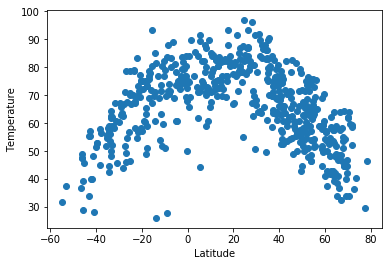

In [32]:
plt.scatter(df['latitude'], df['temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.show()

In [ ]:
plt.scatter(dictionary[])